In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Step 1: Data import

In [2]:
data_set1 = np.genfromtxt('dataSet/set_1.csv', delimiter=',')
data_set2 = np.genfromtxt('dataSet/set_2.csv', delimiter=',')
data_set3 = np.genfromtxt('dataSet/set_3.csv', delimiter=',')

print(data_set1)
print(data_set2)
print(data_set3)

[3. 1. 1. ... 1. 1. 3.]
[ 90.547448  80.548716  92.992958 ...   9.088514 328.988096  84.872411]
[0.002163 0.023507 0.067606 ... 0.109763 0.041012 0.040421]


### Шаг 2: Исследовательский анализ данных

- Рассчитать математическое ожидание и дисперсию для каждого набора данных.
- Построить гистограммы с нормировкой 100% для визуализации распределения данных.

Математическое ожидание характеризует среднее взвешенное значение случайной величины. 

$$ m_x = M[X] = \sum_{i=1}^{n} x_i \cdot p_i $$

Диспе́рсия случа́йной величины́ — мера разброса значений случайной величины относительно её математического ожидания.

$$ \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$

In [3]:
def mathematical_expectation(data_set):
    """
    Вычисляет математическое ожидание.
    :param data_set: набор данных
    :return: Возвращает математическое ожидание для набора данных или 0 если набор пуст
    """
    if len(data_set) == 0:
        return 0

    sum = 0.0

    for value in data_set:
        sum += value

    expected_value = sum / len(data_set)

    return expected_value


def variance(data_set):
    """
    Вчисляет диспресию для набора данных.
    :param data_set: Набор данных.
    :return: 
    """
    mathematical_expectation_value = mathematical_expectation(data_set)

    sum = 0.0

    for value in data_set:
        sum += (value - mathematical_expectation_value) ** 2

    variance_value = sum / len(data_set)

    return variance_value


print("Математическое ожидание:")
print("Набор данных 1:" + str(mathematical_expectation(data_set1)))
print("Набор данных 2:" + str(mathematical_expectation(data_set2)))
print("Набор данных 3:" + str(mathematical_expectation(data_set3)))
print("Дисперсия:")
print("Набор данных 1:" + str(variance(data_set1)))
print("Набор данных 2:" + str(variance(data_set2)))
print("Набор данных 3:" + str(variance(data_set3)))


Математическое ожидание:
Набор данных 1:3.44078
Набор данных 2:16.243283213799984
Набор данных 3:0.12448845074999802
Дисперсия:
Набор данных 1:10.048192991590511
Набор данных 2:10927.40462765338
Набор данных 3:0.025645435018138915


#### Построить гистограммы с нормировкой 100% для визуализации распределения данных


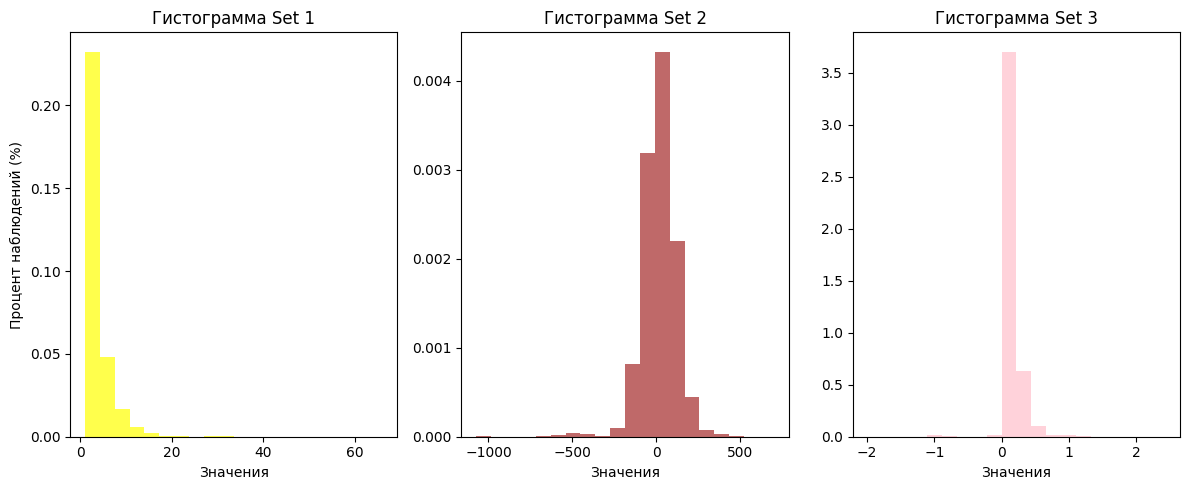

In [4]:
def plot_histogram(data, subplot_index, title, color):
    plt.subplot(1, 3, subplot_index)
    plt.hist(data, bins=20, weights=np.ones(len(data)) / len(data) * 100, alpha=0.7, color=color, density=True)
    plt.xlabel("Значения")
    if subplot_index == 1:
        plt.ylabel("Процент наблюдений (%)")
    plt.title(title)


plt.figure(figsize=(12, 5))
plot_histogram(data_set1, 1, "Гистограмма Set 1", "yellow")
plot_histogram(data_set2, 2, "Гистограмма Set 2", "brown")
plot_histogram(data_set3, 3, "Гистограмма Set 3", "pink")
plt.tight_layout()
plt.show()

# Построение теоретических распределений:

- На основе рассчитанных параметров создать функции распределения:
    - Геометрическое распределение
    - Биномиальное распределение
    - Распределение Пуассона
    - Равномерное распределение
    - Нормальное распределение
    - Экспоненциальное распределение
- Реализовать алгоритмы построения этих распределений вручную, безиспользования соответствующих функций из библиотек (разрешено использовать библиотеку numpy)

## Геометрическое распределение

Геометрическое распределение — это дискретное распределение вероятностей, которое моделирует количество неудачных испытаний до первого успеха в последовательности независимых испытаний, где вероятность успеха в каждом испытании постоянна.

Для геометрического распределения известны готовые формулы для математического ожидания и дисперсии:

$$ M[x] = \frac{1}{p}, D[X] = \frac{q}{p^2} $$

Геометрическое распределение строится по формуле:

$$ p_k = P \{X = k\} = q^k \cdot p $$



Геометрическое распределение недоступно: mathematical_expectation <= 1 или size < 1000


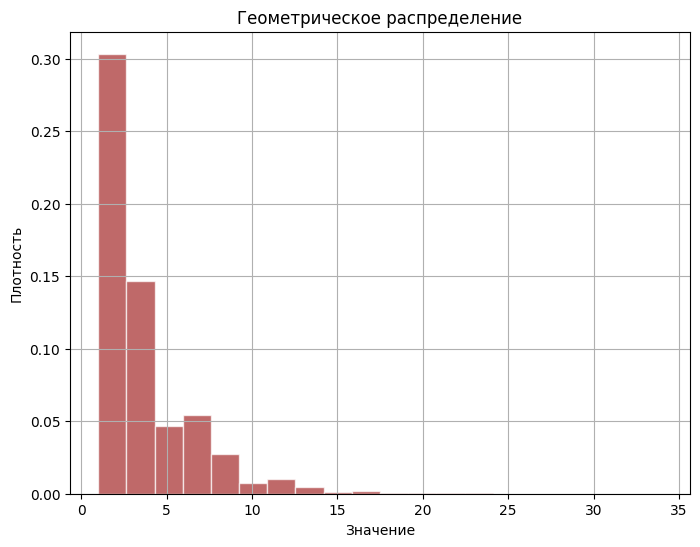

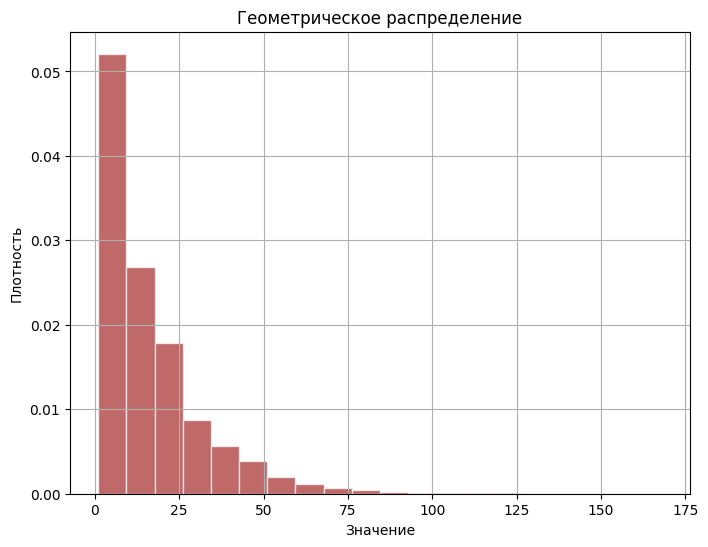

In [5]:
def plot_distribution_histogram(data, name_of_gistogram):
    if len(data) == 0:
        return

    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=20, edgecolor='white', alpha=0.7, color='brown', density=True)
    plt.title(name_of_gistogram)
    plt.xlabel('Значение')
    plt.ylabel('Плотность')
    plt.grid(True)
    plt.show()


def geometric_distribution(math_expectation, size):
    if math_expectation <= 1 or size < 1:
        print("Геометрическое распределение недоступно: mathematical_expectation <= 1 или size < 1000")
        return np.array([])

    p = 1 / math_expectation

    return list(np.random.geometric(p, size=size))


size = 16000

data1_geometric_distribution = geometric_distribution(mathematical_expectation(data_set1), size)
data2_geometric_distribution = geometric_distribution(mathematical_expectation(data_set2), size)
data3_geometric_distribution = geometric_distribution(mathematical_expectation(data_set3), size)

plot_distribution_histogram(data1_geometric_distribution, "Геометрическое распределение")
plot_distribution_histogram(data2_geometric_distribution, "Геометрическое распределение")
plot_distribution_histogram(data3_geometric_distribution, "Геометрическое распределение")

## Биноминальное

Биномиа́льное распределе́ние с параметрами n и p в теории вероятностей — распределение количества «успехов» в последовательности из n независимых случайных экспериментов, таких, что вероятность «успеха» в каждом из них постоянна и равна p.

Дискретная случайная величина X имеет биноминальное распределение, если ее закон распределения описывается формулой Бернулли:
$$ P\{X = k\} = P(n,k) = C_n^k \cdot p^k \cdot q^{n-k} $$

$$ M[x] = n\cdot p, D[x] = n\cdot p \cdot q $$



In [6]:
def binomial(math_expectation_value, varience_value, size):
    if math_expectation_value <= 0 or varience_value < 1 or size < 1:
        print("Биномиальное распределение недоступно: mathematical_expectation <= 0 или varience_value<1 или size < 1")
        return np.array([])

    p = 1 - (varience_value / math_expectation_value)

    if p <= 0 or p >= 1:
        print("Биномиальное распределение недоступно: p не в диапозоне от 0 до 1")
        return np.array([])

    n = round(math_expectation_value / p)

    return list(np.random.binomial(n, p, size=size))


size = 16000

data1_binomial = binomial(mathematical_expectation(data_set1), variance(data_set1), size)
data2_binomial = binomial(mathematical_expectation(data_set2), variance(data_set2), size)
data3_binomial = binomial(mathematical_expectation(data_set3), variance(data_set3), size)

plot_distribution_histogram(data1_binomial, "Биномиальное распределение")
plot_distribution_histogram(data2_binomial, "Биномиальное распределение")
plot_distribution_histogram(data3_binomial, "Биномиальное распределение")
    
    

Биномиальное распределение недоступно: p не в диапозоне от 0 до 1
Биномиальное распределение недоступно: p не в диапозоне от 0 до 1
Биномиальное распределение недоступно: mathematical_expectation <= 0 или varience_value<1 или size < 1


## Пуассона

Распределе́ние Пуассо́на — распределение дискретного типа случайной величины, представляющей собой число событий, произошедших за фиксированное время, при условии, что данные события происходят с некоторой фиксированной средней интенсивностью и независимо друг от друга.

Соотношениями, описывающими биноминальное распределение, удобно пользоваться в тех случаях, если величина и достаточно мала, а р велико.

Теорема: Если, n → ∞, а p → 0 так, что np = α (0 < α < ∞), то
$$ P\{X = k\} = C_n^k \cdot p^k \cdot q^{n-k} = \frac{α^k}{k!}\cdot e^{-α} $$

$$ M[X] = α, D[X] = α $$


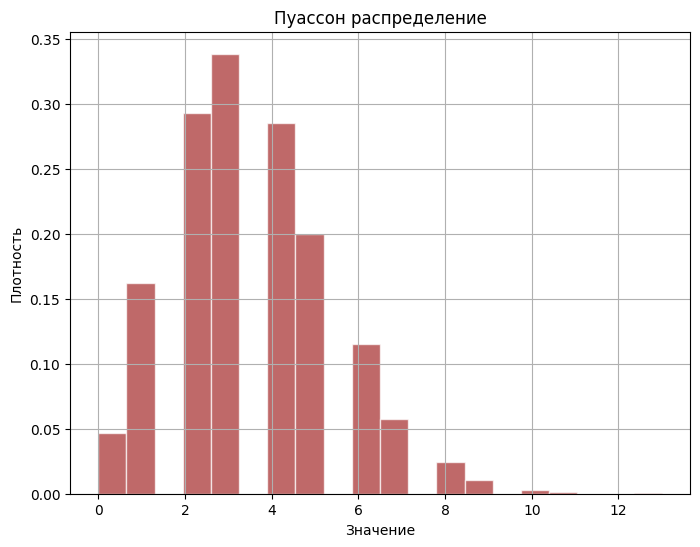

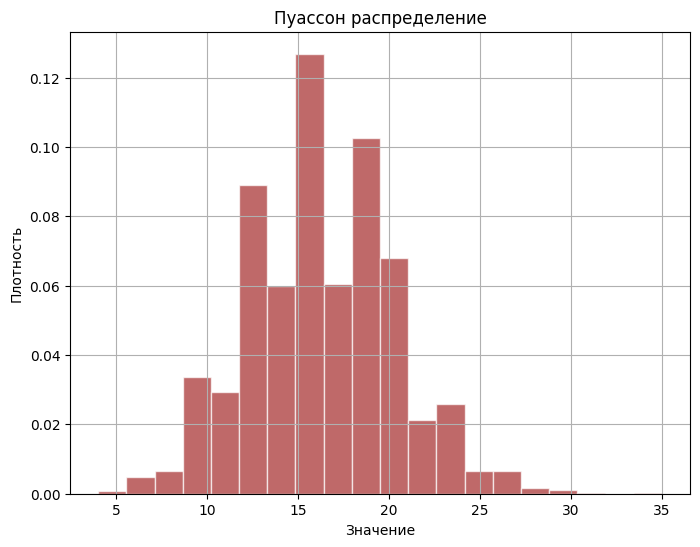

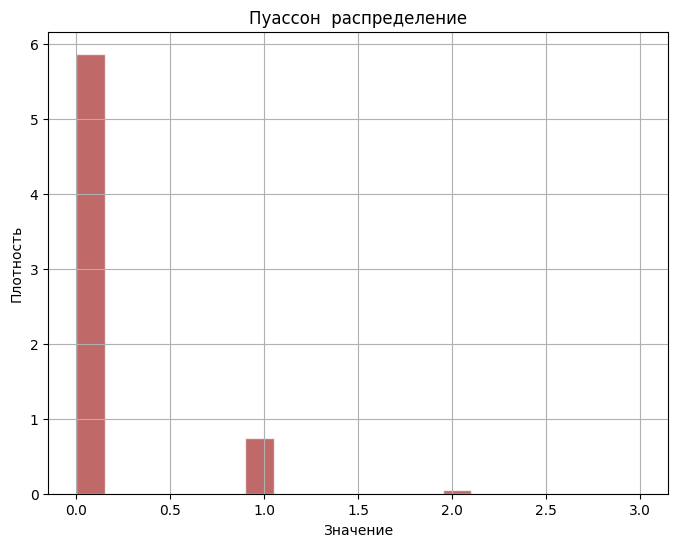

In [7]:
def poisson(math_expectation_value, size):
    lambda_value = math_expectation_value
    return list(np.random.poisson(lambda_value, size=size))

size = 16000

data1_poisson = poisson(mathematical_expectation(data_set1), size)
data2_poisson = poisson(mathematical_expectation(data_set2), size)
data3_poisson = poisson(mathematical_expectation(data_set3), size)

plot_distribution_histogram(data1_poisson, "Пуассон распределение")
plot_distribution_histogram(data2_poisson, "Пуассон распределение")
plot_distribution_histogram(data3_poisson, "Пуассон  распределение")

# Равномерное распределение

Непреры́вное равноме́рное распределе́ние в теории вероятностей — распределение случайной вещественной величины, принимающей значения, принадлежащие некоторому промежутку конечной длины, характеризующееся тем, что плотность вероятности на этом промежутке почти всюду постоянна.

$$ M[X] = \frac{a + b}{2} $$ 
$$ D[X] = \frac{(b - a)^2}{12} $$  


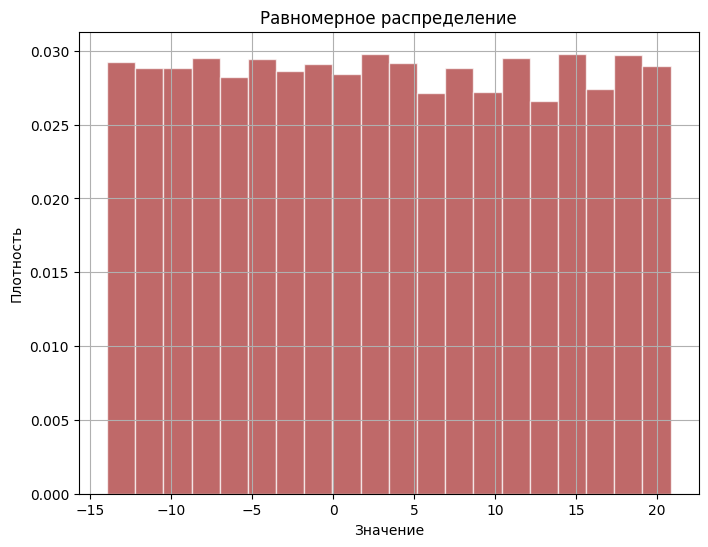

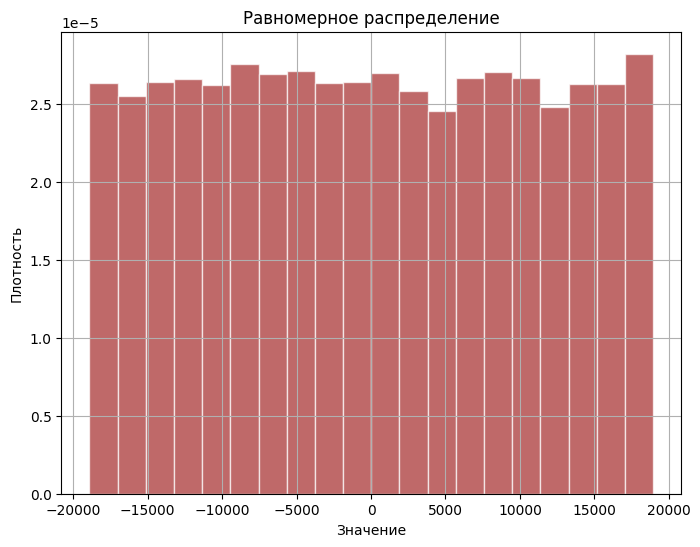

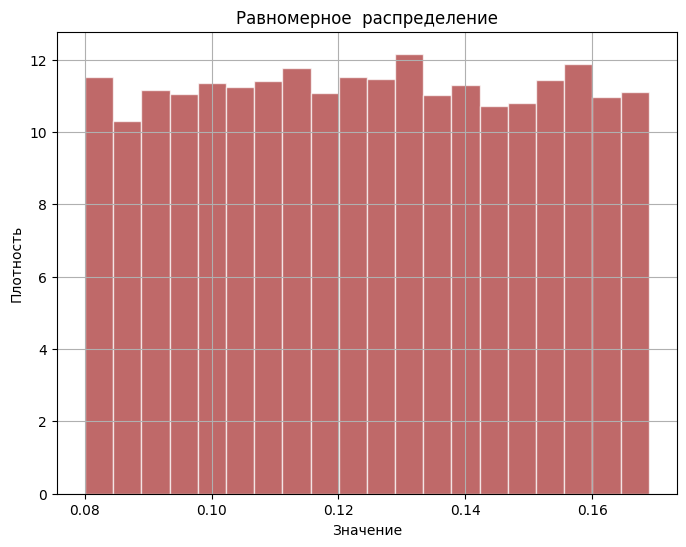

In [8]:
def uniform(math_expectation_value, varience_value, size):
    a = math_expectation_value - math.sqrt(3) * varience_value
    b = math_expectation_value + math.sqrt(3) * varience_value

    return list(np.random.uniform(a, b, size))

size = 16000

data1_uniform = uniform(mathematical_expectation(data_set1), variance(data_set1), size)
data2_uniform = uniform(mathematical_expectation(data_set2), variance(data_set2), size)
data3_uniform = uniform(mathematical_expectation(data_set3), variance(data_set3), size)

plot_distribution_histogram(data1_uniform, "Равномерное распределение")
plot_distribution_histogram(data2_uniform, "Равномерное распределение")
plot_distribution_histogram(data3_uniform, "Равномерное  распределение")

### Нормальное распределение

Норма́льное распределе́ние, также называемое распределением Гаусса или Гаусса — Лапласа — распределение вероятностей, которое в одномерном случае задаётся функцией плотности вероятности, совпадающей с функцией Гаусса: 
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2}
$$



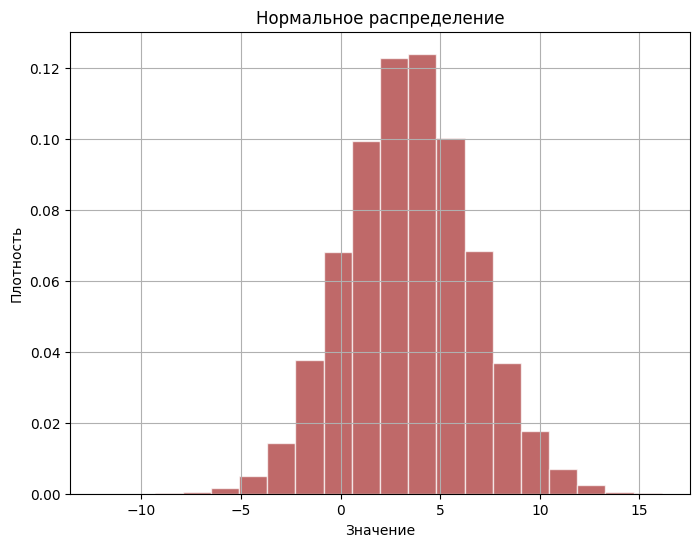

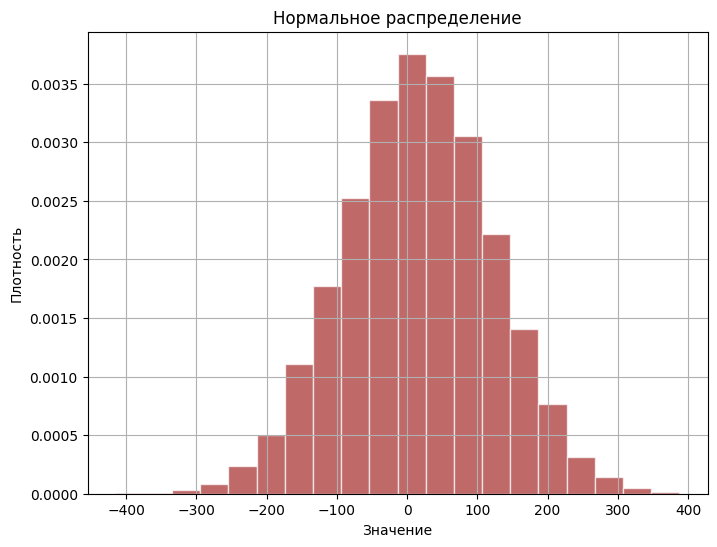

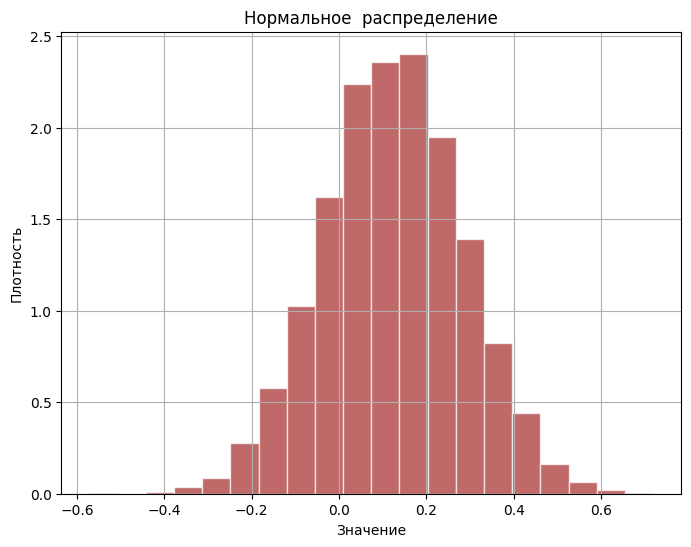

In [9]:
def normal(mean, variance_value, n):
    return list(np.random.normal(mean, math.sqrt(variance_value), n))

size = 16000

data1_normal = normal(mathematical_expectation(data_set1), variance(data_set1), size)
data2_normal = normal(mathematical_expectation(data_set2), variance(data_set2), size)
data3_normal = normal(mathematical_expectation(data_set3), variance(data_set3), size)

plot_distribution_histogram(data1_normal, "Нормальное распределение")
plot_distribution_histogram(data2_normal, "Нормальное распределение")
plot_distribution_histogram(data3_normal, "Нормальное  распределение")


### Экспоненциальное распределение

Экспоненциа́льное распределе́ние — абсолютно непрерывное распределение, моделирующее время между двумя последовательными свершениями одного и того же события.

$$ M[X] = \frac{1}{\lambda} $$  

$$ D[X] = \frac{1}{\lambda^2} $$  

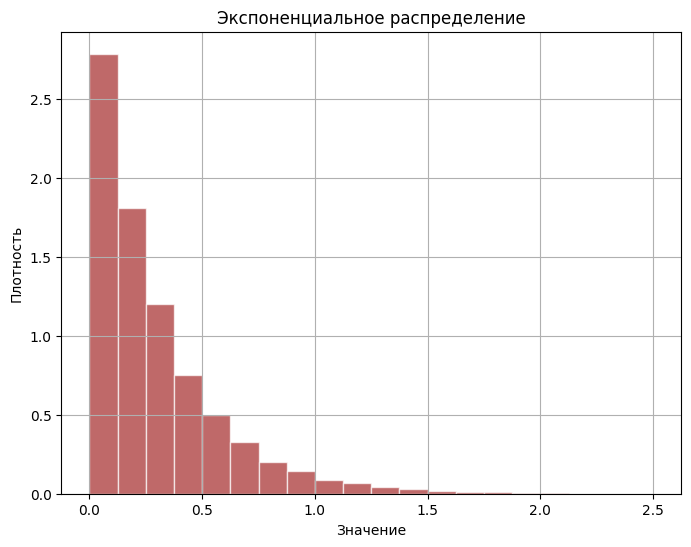

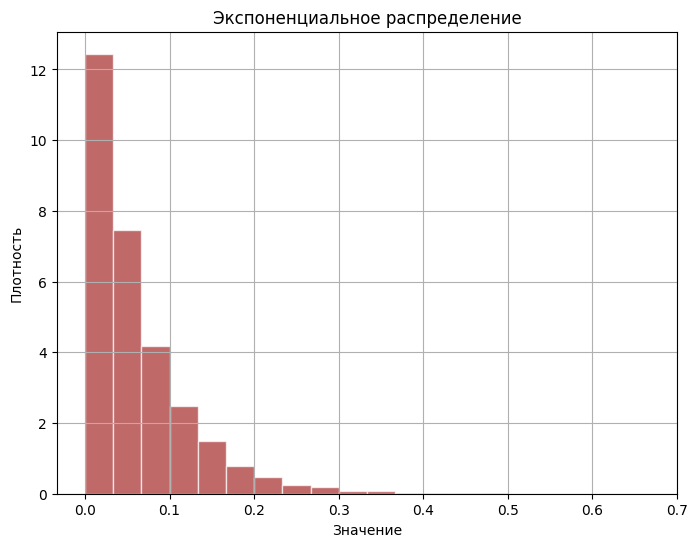

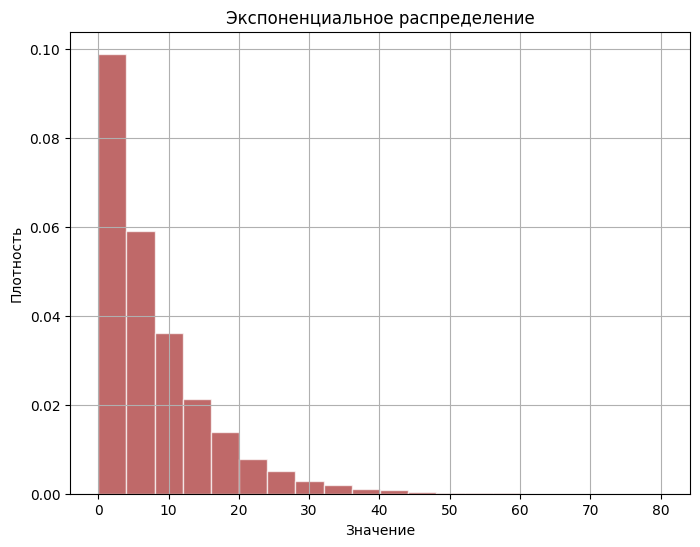

In [10]:
def exponential(math_expectation_value, varience_value, size):
    return list(np.random.exponential(1/math_expectation_value, size=size))

size = 16000

data1_exponential = exponential(mathematical_expectation(data_set1), variance(data_set1), size)
data2_exponential = exponential(mathematical_expectation(data_set2), variance(data_set2), size)
data3_exponential = exponential(mathematical_expectation(data_set3), variance(data_set3), size)

plot_distribution_histogram(data1_exponential, "Экспоненциальное распределение")
plot_distribution_histogram(data2_exponential, "Экспоненциальное распределение")
plot_distribution_histogram(data3_exponential, "Экспоненциальное распределение")

# Шаг 4: Визуальное сравнение

- Наложить теоретические распределения на соответствующие гистограммы.
- Проанализировать соответствие эмпирических данных и теоретическихмоделей.

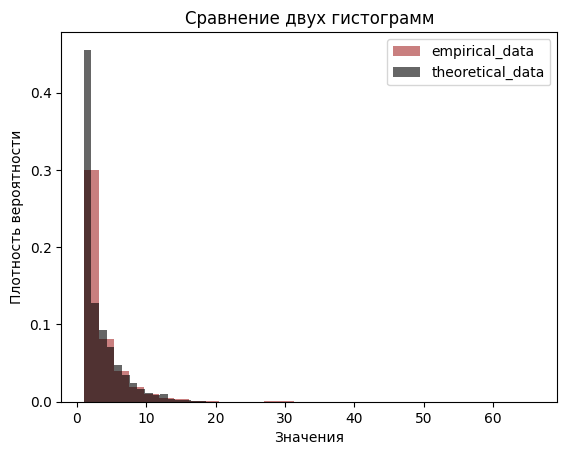

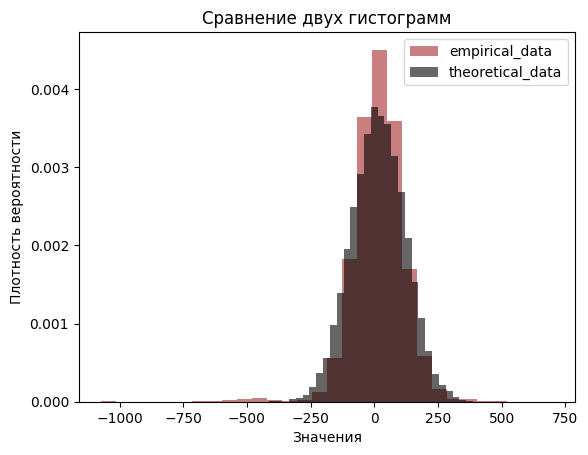

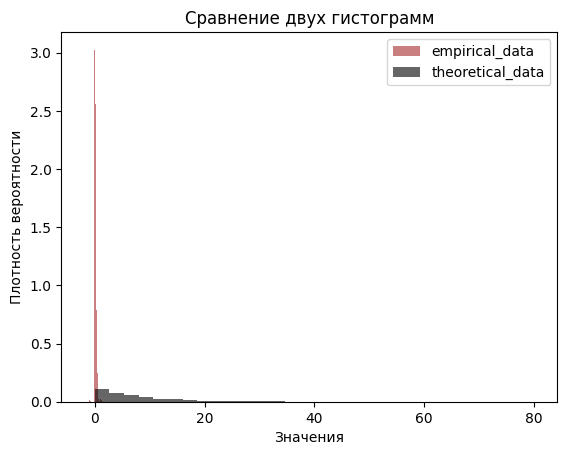

In [11]:
def plot_two_histograms(empirical_data, theoretical_data, bins=30, color1='brown', color2='black', alpha=0.6, label1='empirical_data', label2='theoretical_data'):
    plt.hist(empirical_data, bins=bins, alpha=alpha, color=color1, label=label1, density=True)
    plt.hist(theoretical_data, bins=bins, alpha=alpha, color=color2, label=label2, density=True)
    
    plt.title('Сравнение двух гистограмм')
    plt.xlabel('Значения')
    plt.ylabel('Плотность вероятности')
    plt.legend()

    plt.show()
    
plot_two_histograms(data_set1, data1_geometric_distribution)

plot_two_histograms(data_set2, data2_normal)

plot_two_histograms(data_set3, data3_exponential)